In [216]:
''' 
Shana Soyfer 
DS2500 Project
'''

' \nShana Soyfer \nDS2500 Project\n'

In [217]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
DIABETES = 'diabetes_surveys.csv'

In [218]:
def clean_data(file):
    ''' Function: dataframe
        Parameter: file
        Returns: dataframe that is modified slightly
        Does: reads in a dataframe and removes columns
    '''
    file = pd.read_csv('diabetes_surveys.csv')
    
    # This drops all the columns that have blank data 
      
    insulin_dfs = file.drop(columns = ['Hispanic Insulin Only - Lower Limit', 'Hispanic Insulin Only - Upper Limit', 
                'Non-Hispanic White Insulin Only - Lower Limit', 'Non-Hispanic White Insulin Only - Upper Limit', 
                'Non-Hispanic Black Insulin Only - Lower Limit', 'Non-Hispanic Black Insulin Only - Upper Limit', 
                'Non-Hispanic Asian Insulin Only - Percentage', 'Non-Hispanic Asian Insulin Only - Lower Limit', 
                'Non-Hispanic Asian Insulin Only - Upper Limit'])
    
    # Due to the nature of the dataframe, create a new empty dataframe that has the different types of races, year, and percentage
    years = insulin_dfs['Year'].values
    new_df = pd.DataFrame()
    
    # Change the race names from the dataset 
    new_race_names = {'Hispanic Insulin Only - Percentage': 'Hispanic',
                      'Non-Hispanic White Insulin Only - Percentage': 'White', 
                      'Non-Hispanic Black Insulin Only - Percentage': 'Black'
                     }
    
    # Create a new version of the dataframe 
    for r in ['Hispanic Insulin Only - Percentage', 'Non-Hispanic White Insulin Only - Percentage', 
              'Non-Hispanic Black Insulin Only - Percentage']:
        r_info = insulin_dfs[r].values
        r_df = pd.DataFrame({'Race': [new_race_names[r]]*len(years), 'Year': years, 'Percentage': r_info})
        new_df = pd.concat([new_df, r_df])
        
    # This method was figured out and inspired by the Pandas documentation: 
    # https://pandas.pydata.org/docs/reference/api/pandas.concat.html
    

    return new_df



In [219]:
def seaborn(plot):
    ''' Function: seaborn 
        Parameter: dataframe that will utilize the seaborn library
        Returns: nothing, just plotting a seaborn library 
        Does: create a seaborn library 
    '''
    
    # Load the dataset
    sns.set_theme(style = 'whitegrid', palette = ['#CCCCCC'])
    insulin_access = clean_data(DIABETES)
    
    # For the sake of a cleaner graph, only obtain data from the last two years of the dataset 
    two_years_data = insulin_access[(insulin_access['Year'] >= 2019)]
    
    # Create a histoplot 
    # Used this documentation: https://seaborn.pydata.org/generated/seaborn.lineplot.html
    sns.lineplot(data = two_years_data, x = 'Year', y = 'Percentage', hue = 'Race', style = 'Race',
                 markers = True, dashes = False)
    

In [220]:
def plot_race(races):
    ''' Function: plot_races
        Parameters: races, the panda dataframe
        Returns: nothing
        Does: Plots the races and percentage of those who received insulin
    '''
    
    
    # Create a title and x and y labels 
    plt.title('Insulin Percentage Based On Race Throughout The Years', fontweight = 'bold')
    plt.xlabel('Year', fontweight = 'bold')
    plt.xticks([2019, 2020, 2021])
    plt.ylabel('Percentage', fontweight = 'bold')
    
    # Create a gridline and a caption
    plt.grid(True, linestyle = '--', linewidth = 0.7, alpha = 0.8)
    txt = 'Based on CDC surveillance data, this plot shows the percentage of diabetics who utilized insulin to treat diabetes from 2019 to 2022 based on race. White Americans had the highest percentage of insulin use among Hispanic and Black people.'
    plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment = 'center', fontsize=12)
    plt.show()

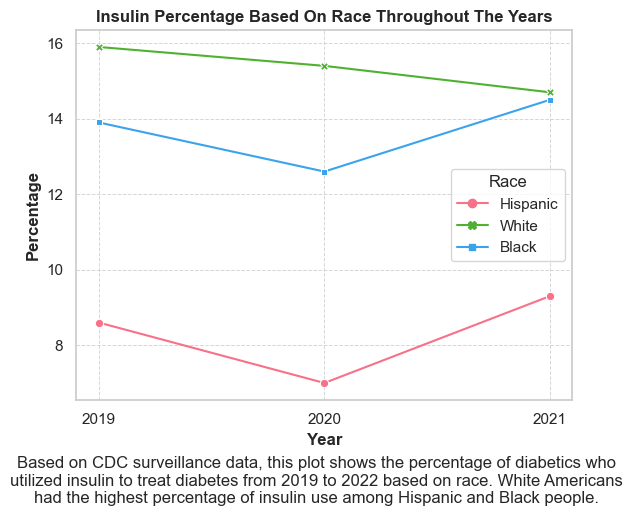

In [221]:
def main():
    insulin_race = clean_data(DIABETES)
    insulin_races = seaborn(insulin_race)
    insulin_plot = plot_race(insulin_races)


main()